In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv("5 min traffic intensity 2016 2017.csv")
data2 = pd.read_csv("5 min traffic intensity 2018 2019.csv")
data3 = pd.read_csv("5 min traffic intensity 2016 2019 locaties aangepast 2.csv")

C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\1096278069.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("5 min traffic intensity 2016 2017.csv")
C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\1096278069.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("5 min traffic intensity 2018 2019.csv")


In [3]:
stacked_data = pd.concat([data1, data2, data3], axis=0)

# Reset index if needed
#stacked_data.reset_index(drop=True, inplace=True)

# Display the stacked DataFrame
stacked_data.head()

,id_meetlocatie,start_meetperiode,eind_meetperiode,ndw_index,gebruikte_minuten_intensiteit,gebruikte_minuten_snelheid,gem_intensiteit,gem_snelheid,totaal_aantal_rijstroken,rijrichting,technical_exclusion,traffic_flow_deviation_exclusions
0,RWS01_MONIBAS_0021hrl0414ra,2016-01-01 00:00:00,2016-01-01 00:05:00,F1A,5.0,0.0,0.0,-1.00,5,northBound,NaN,NaN
1,RWS01_MONIBAS_0021hrl0414ra,2016-01-01 00:00:00,2016-01-01 00:05:00,F3A,5.0,3.0,36.0,98.60,5,northBound,NaN,NaN
2,RWS01_MONIBAS_0021hrl0414ra,2016-01-01 00:00:00,2016-01-01 00:05:00,F5A,5.0,4.0,72.0,128.47,5,northBound,NaN,NaN
3,RWS01_MONIBAS_0021hrl0414ra,2016-01-01 00:00:00,2016-01-01 00:05:00,F7A,5.0,5.0,144.0,116.31,5,northBound,NaN,NaN
4,RWS01_MONIBAS_0021hrl0414ra,2016-01-01 00:00:00,2016-01-01 00:05:00,F9A,5.0,4.0,180.0,101.67,5,northBound,NaN,NaN


In [4]:
# Define the list of values to be removed
values_to_remove = ['RWS01_MONIBAS_0071hrl1805ra', 'RWS01_MONIBAS_0281hrl1476ra',
                    'RWS01_MONIBAS_0071hrr1805ra', 'RWS01_MONIBAS_0281hrr1476ra',
                    'RWS01_MONIBAS_0321hrr0654ra', 'RWS01_MONIBAS_0321hrl0654ra',
                    'RWS01_MONIBAS_0321hrr0467ra', 'RWS01_MONIBAS_0321hrl0467ra']

# Filter out rows with specified values in the id_meetlocatie column
stacked_data = stacked_data[~stacked_data['id_meetlocatie'].isin(values_to_remove)]

# Reset index if needed
stacked_data.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
#filtered_stacked_data.head()

In [5]:
data = stacked_data

In [6]:
# Assuming 'data' is your DataFrame
data['gem_intensiteit'] = data['gem_intensiteit'].replace(-1, 0)
data['gem_snelheid'] = data['gem_snelheid'].replace(-1, 0)

In [7]:
#check for missing values

data.groupby('id_meetlocatie').apply(lambda x: x['gem_snelheid'].isnull().sum())

id_meetlocatie
RWS01_MONIBAS_0021hrl0414ra    0
RWS01_MONIBAS_0021hrl1309ra    0
RWS01_MONIBAS_0021hrl2368ra    0
RWS01_MONIBAS_0021hrr0415ra    0
RWS01_MONIBAS_0021hrr1309ra    0
RWS01_MONIBAS_0021hrr2368ra    0
RWS01_MONIBAS_0041hrl0151ra    0
RWS01_MONIBAS_0041hrr0152ra    0
RWS01_MONIBAS_0070vwb1401ra    0
RWS01_MONIBAS_0070vwc1401ra    0
RWS01_MONIBAS_0071hrl1933ra    0
RWS01_MONIBAS_0071hrr1933ra    0
RWS01_MONIBAS_0131hrl0122ra    0
RWS01_MONIBAS_0131hrr0122ra    0
RWS01_MONIBAS_0271hrl1140ra    0
RWS01_MONIBAS_0271hrr1140ra    0
RWS01_MONIBAS_0281hrl1029ra    0
RWS01_MONIBAS_0281hrl1857ra    0
RWS01_MONIBAS_0281hrr1029ra    0
RWS01_MONIBAS_0281hrr1857ra    0
RWS01_MONIBAS_0731hrl1018ra    0
RWS01_MONIBAS_0731hrr1018ra    0
dtype: int64

In [8]:
data["ndw_index"].unique()

array(['F1A', 'F3A', 'F5A', 'F7A', 'F9A', 'F801A', 'F1B', 'F2B', 'F3B',
       'F4B', 'F9B', 'F10B', 'F11B', 'F12B'], dtype=object)

In [9]:
#remove stopping lane

data = data[data['ndw_index'] != 'F801A']

In [10]:
# Assuming 'data' is your DataFrame and 'time_column' is the name of the column containing the datetime values
data['time_column'] = pd.to_datetime(data['start_meetperiode'])  # Convert to datetime if not already

# Extract year, month, day, hour, and minute into separate columns
data['date'] = data['time_column'].dt.date
data['year'] = data['time_column'].dt.year
data['month'] = data['time_column'].dt.month
data['day'] = data['time_column'].dt.day
data['hour'] = data['time_column'].dt.hour
data['minute'] = data['time_column'].dt.minute
data['day_of_week'] = data['time_column'].dt.dayofweek
data['weekend'] = (data['day_of_week'] >= 5).astype(int)

# Now you have separate columns for year, month, day, hour, and minute

C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\1678938041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_column'] = pd.to_datetime(data['start_meetperiode'])  # Convert to datetime if not already
C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\1678938041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['time_column'].dt.date
C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\1678938041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [11]:
# Add 0.000001 to the values in the "gem_intensiteit" column
data['gem_intensiteit'] += 0.000001

C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\3166473090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gem_intensiteit'] += 0.000001


In [12]:
data['intensiteit'] = data['gem_intensiteit']/12

C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\191123816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['intensiteit'] = data['gem_intensiteit']/12


In [13]:
data['sumspeed'] = data['intensiteit'] * data ['gem_snelheid']

C:\Users\u180569\AppData\Local\Temp\ipykernel_8024\3443430302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sumspeed'] = data['intensiteit'] * data ['gem_snelheid']


In [24]:
'''RWS01_MONIBAS_0071hrl1805ra', 'RWS01_MONIBAS_0281hrl1476ra',
                    'RWS01_MONIBAS_0071hrr1805ra', 'RWS01_MONIBAS_0281hrr1476ra',
                    'RWS01_MONIBAS_0321hrr0654ra', 'RWS01_MONIBAS_0321hrl0654ra',
                    'RWS01_MONIBAS_0321hrr0467ra', 'RWS01_MONIBAS_0321hrl0467ra'''

"RWS01_MONIBAS_0071hrl1805ra', 'RWS01_MONIBAS_0281hrl1476ra',\n                    'RWS01_MONIBAS_0071hrr1805ra', 'RWS01_MONIBAS_0281hrr1476ra',\n                    'RWS01_MONIBAS_0321hrr0654ra', 'RWS01_MONIBAS_0321hrl0654ra',\n                    'RWS01_MONIBAS_0321hrr0467ra', 'RWS01_MONIBAS_0321hrl0467ra"

In [14]:
data.groupby('id_meetlocatie').apply(lambda x: x['gem_snelheid'].isnull().sum())

MemoryError: Unable to allocate 2.46 GiB for an array with shape (7, 47147006) and data type int64

In [15]:
# Select the columns to group by
group_columns = ['id_meetlocatie', 'date', 'year', 'month', 'day', 'hour', 'minute', 'day_of_week', 'weekend', 'totaal_aantal_rijstroken']

# Group by the selected columns and aggregate other columns
grouped_data = data.groupby(group_columns).agg({'lanes' : 'sum', 'intensiteit': 'sum', 'sumspeed': 'sum'}).reset_index()

In [16]:
grouped_data['avg_speed'] = grouped_data['sumspeed'] / grouped_data['intensiteit']
grouped_data = grouped_data.drop(columns=['sumspeed'])

In [17]:
grouped_data.head(20)

,id_meetlocatie,date,year,month,day,hour,minute,day_of_week,weekend,lanes,intensiteit,avg_speed
0,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,0,4,0,10,72.000001,110.760833
1,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,5,4,0,10,46.000001,108.158261
2,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,10,4,0,10,54.000001,102.365926
3,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,15,4,0,10,42.000001,111.680952
4,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,20,4,0,10,34.500001,114.750724
5,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,25,4,0,10,84.000001,111.105238
6,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,30,4,0,10,108.000001,104.874444
7,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,35,4,0,10,60.000001,106.724666
8,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,40,4,0,10,70.000001,105.063714
9,RWS01_MONIBAS_0021hrl0414ra,2016-01-01,2016,1,1,0,45,4,0,10,86.000001,103.755814


In [21]:
grouped_data.shape

(5704203, 12)

In [ ]:
'''test to see whether null variables'''
#grouped_data.groupby('id_meetlocatie').apply(lambda x: x['avg_speed'].isnull().sum())

In [16]:
#grouped_data['hour'] = pd.to_numeric(grouped_data['hour'], errors='coerce')

In [148]:
#grouped_data = grouped_data[(grouped_data['hour'] > 5)] 

In [149]:
#grouped_data = grouped_data[(grouped_data['hour'] < 21)]

In [19]:
holidays = pd.read_csv("Nationale Feestdagen.csv")

In [20]:
holidays

,Feestdag,Datum
0,Nieuwjaarsdag 2021,01 Jan 2021
1,Goede vrijdag 2021,02 Apr 2021
2,1e Paasdag 2021,04 Apr 2021
3,2e Paasdag 2021,05 Apr 2021
4,Koningsdag 2021,27 Apr 2021
5,Bevrijdingsdag 2021,05 May 2021
6,Hemelvaart 2021,13 May 2021
7,1e Pinksterdag 2021,23 May 2021
8,2e Pinksterdag 2021,24 May 2021
9,1e Kerstdag 2021,25 Dec 2021


In [23]:
import pandas as pd

# Assuming holidays is your DataFrame and 'date' is the column containing dates
# Convert 'date' column to datetime object
holidays['date'] = pd.to_datetime(holidays['date'], errors='coerce')

# Check unique values and infer date format
unique_dates = holidays['date'].dropna().dt.strftime('%Y-%m-%d').unique()
date_format = unique_dates[0] if len(unique_dates) == 1 else "Multiple formats detected"

# Print the inferred date format
print("Inferred date format:", date_format)

Inferred date format: Multiple formats detected


In [24]:
grouped_data['date'] = pd.to_datetime(grouped_data['date'], errors='coerce')

# Check unique values and infer date format
unique_dates = grouped_data['date'].dropna().dt.strftime('%Y-%m-%d').unique()
date_format = unique_dates[0] if len(unique_dates) == 1 else "Multiple formats detected"

# Print the inferred date format
print("Inferred date format:", date_format)

Inferred date format: Multiple formats detected


In [33]:
# Round the 'intensiteit' and 'alg_speed' columns to two decimals
grouped_data['intensiteit'] = grouped_data['intensiteit'].round(2)
grouped_data['avg_speed'] = grouped_data['avg_speed'].round(2)


                      id_meetlocatie       date  year  month  day  hour  \
0        RWS01_MONIBAS_0021hrl0414ra 2016-01-01  2016      1    1     0   
1        RWS01_MONIBAS_0021hrl0414ra 2016-01-01  2016      1    1     0   
2        RWS01_MONIBAS_0021hrl0414ra 2016-01-01  2016      1    1     0   
3        RWS01_MONIBAS_0021hrl0414ra 2016-01-01  2016      1    1     0   
4        RWS01_MONIBAS_0021hrl0414ra 2016-01-01  2016      1    1     1   
...                              ...        ...   ...    ...  ...   ...   
3013327  RWS01_MONIBAS_0731hrr1018ra 2019-12-31  2019     12   31    22   
3013328  RWS01_MONIBAS_0731hrr1018ra 2019-12-31  2019     12   31    23   
3013329  RWS01_MONIBAS_0731hrr1018ra 2019-12-31  2019     12   31    23   
3013330  RWS01_MONIBAS_0731hrr1018ra 2019-12-31  2019     12   31    23   
3013331  RWS01_MONIBAS_0731hrr1018ra 2019-12-31  2019     12   31    23   

         minute  day_of_week  weekend  lanes  intensiteit  avg_speed  
0             0            4

In [51]:
merged_data = pd.merge(grouped_data, holidays, on='date', how='left')

merged_data['is_public_holiday'] = merged_data['is_public_holiday'].fillna(0).astype(int)

In [52]:
# Assuming 'grouped_data' is your DataFrame and 'id_meetlocatie' is the name of the ID column
# Using pandas get_dummies function for one-hot encoding
encoded_data = pd.get_dummies(merged_data, columns=['id_meetlocatie'])

# If you want to drop the original 'id_meetlocatie' column, you can do it like this
# encoded_data.drop(columns=['id_meetlocatie'], inplace=True)


In [48]:
encoded_data

,year,month,day,hour,minute,day_of_week,weekend,lanes,intensiteit,avg_speed,...,id_meetlocatie_RWS01_MONIBAS_0131hrl0122ra,id_meetlocatie_RWS01_MONIBAS_0131hrr0122ra,id_meetlocatie_RWS01_MONIBAS_0271hrl1140ra,id_meetlocatie_RWS01_MONIBAS_0271hrr1140ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1857ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1857ra,id_meetlocatie_RWS01_MONIBAS_0731hrl1018ra,id_meetlocatie_RWS01_MONIBAS_0731hrr1018ra
0,2016,1,1,0,0,4,0,5,86.00,105.61,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,1,0,15,4,0,5,80.50,111.07,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,1,0,30,4,0,5,119.00,104.57,...,0,0,0,0,0,0,0,0,0,0
3,2016,1,1,0,45,4,0,5,166.00,102.91,...,0,0,0,0,0,0,0,0,0,0
4,2016,1,1,1,0,4,0,5,262.25,101.37,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013327,2019,12,31,22,45,1,0,8,102.00,113.43,...,0,0,0,0,0,0,0,0,0,1
3013328,2019,12,31,23,0,1,0,8,78.00,114.02,...,0,0,0,0,0,0,0,0,0,1
3013329,2019,12,31,23,15,1,0,8,64.00,116.88,...,0,0,0,0,0,0,0,0,0,1
3013330,2019,12,31,23,30,1,0,8,34.00,123.87,...,0,0,0,0,0,0,0,0,0,1


In [54]:
import pandas as pd

# Assuming 'encoded_data' is your original dataframe with a 'date' column

# Convert 'date' column to datetime if it's not already
encoded_data['date'] = pd.to_datetime(encoded_data['date'])

# Filter data for train_data, val_data, and test_data
train_data = encoded_data[(encoded_data['date'] >= '2016-01-01') & (encoded_data['date'] <= '2018-10-31')]
val_data = encoded_data[(encoded_data['date'] >= '2018-11-01') & (encoded_data['date'] <= '2019-02-28')]
test_data = encoded_data[(encoded_data['date'] >= '2019-03-01') & (encoded_data['date'] <= '2019-12-31')]

# Optionally, you can reset index if you want
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


In [55]:
train_data = train_data.drop(columns=['date'])
val_data = val_data.drop(columns=['date'])
test_data = test_data.drop(columns=['date'])

In [56]:
val_data

,year,month,day,hour,minute,day_of_week,weekend,lanes,intensiteit,avg_speed,...,id_meetlocatie_RWS01_MONIBAS_0131hrl0122ra,id_meetlocatie_RWS01_MONIBAS_0131hrr0122ra,id_meetlocatie_RWS01_MONIBAS_0271hrl1140ra,id_meetlocatie_RWS01_MONIBAS_0271hrr1140ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1857ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1857ra,id_meetlocatie_RWS01_MONIBAS_0731hrl1018ra,id_meetlocatie_RWS01_MONIBAS_0731hrr1018ra
0,2018,11,1,0,0,3,0,5,267.0,113.27,...,0,0,0,0,0,0,0,0,0,0
1,2018,11,1,0,15,3,0,5,189.0,111.08,...,0,0,0,0,0,0,0,0,0,0
2,2018,11,1,0,30,3,0,5,169.0,111.66,...,0,0,0,0,0,0,0,0,0,0
3,2018,11,1,0,45,3,0,5,138.0,109.03,...,0,0,0,0,0,0,0,0,0,0
4,2018,11,1,1,0,3,0,5,113.0,108.23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231647,2019,2,28,22,45,3,0,8,156.0,116.53,...,0,0,0,0,0,0,0,0,0,1
231648,2019,2,28,23,0,3,0,8,146.0,115.88,...,0,0,0,0,0,0,0,0,0,1
231649,2019,2,28,23,15,3,0,8,118.0,111.13,...,0,0,0,0,0,0,0,0,0,1
231650,2019,2,28,23,30,3,0,8,148.0,121.50,...,0,0,0,0,0,0,0,0,0,1


In [57]:
train_data.dtypes

year                                            int64
month                                           int64
day                                             int64
hour                                            int64
minute                                          int64
day_of_week                                     int64
weekend                                         int64
lanes                                           int64
intensiteit                                   float64
avg_speed                                     float64
is_public_holiday                               int64
id_meetlocatie_RWS01_MONIBAS_0021hrl0414ra      uint8
id_meetlocatie_RWS01_MONIBAS_0021hrl1309ra      uint8
id_meetlocatie_RWS01_MONIBAS_0021hrl2368ra      uint8
id_meetlocatie_RWS01_MONIBAS_0021hrr0415ra      uint8
id_meetlocatie_RWS01_MONIBAS_0021hrr1309ra      uint8
id_meetlocatie_RWS01_MONIBAS_0021hrr2368ra      uint8
id_meetlocatie_RWS01_MONIBAS_0041hrl0151ra      uint8
id_meetlocatie_RWS01_MONIBAS

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Preprocess the data
# Assuming 'train_data' and 'test_data' are your DataFrames and 'avg_speed' is the target variable
# No need to drop missing values if you've already cleaned the data
X_train = train_data.drop(['avg_speed'], axis=1)  # Features for training
y_train = train_data['avg_speed']  # Target variable for training
X_test = test_data.drop(['avg_speed'], axis=1)  # Features for testing
y_test = test_data['avg_speed']  # Target variable for testing

# Step 2: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize Random Forest model
model.fit(X_train, y_train)  # Train the model

# Step 3: Evaluate the model
y_pred = model.predict(X_test)  # Make predictions
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- predicted_avg_speed


In [86]:
# Assuming your original dataset is named 'data'
test_data['predicted_avg_speed'] = y_pred

In [87]:
test_data.head(20)

,year,month,day,hour,minute,day_of_week,weekend,lanes,intensiteit,avg_speed,...,id_meetlocatie_RWS01_MONIBAS_0131hrr0122ra,id_meetlocatie_RWS01_MONIBAS_0271hrl1140ra,id_meetlocatie_RWS01_MONIBAS_0271hrr1140ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1857ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1857ra,id_meetlocatie_RWS01_MONIBAS_0731hrl1018ra,id_meetlocatie_RWS01_MONIBAS_0731hrr1018ra,predicted_avg_speed
0,2019,3,1,0,0,4,0,5,170.0,113.15,...,0,0,0,0,0,0,0,0,0,110.9960
1,2019,3,1,0,15,4,0,5,187.0,111.09,...,0,0,0,0,0,0,0,0,0,111.6150
2,2019,3,1,0,30,4,0,5,180.0,116.25,...,0,0,0,0,0,0,0,0,0,109.4130
3,2019,3,1,0,45,4,0,5,208.0,113.90,...,0,0,0,0,0,0,0,0,0,111.9955
4,2019,3,1,1,0,4,0,5,148.0,106.59,...,0,0,0,0,0,0,0,0,0,108.5415
5,2019,3,1,1,15,4,0,5,123.0,107.28,...,0,0,0,0,0,0,0,0,0,107.2460
6,2019,3,1,1,30,4,0,5,88.0,105.63,...,0,0,0,0,0,0,0,0,0,104.0380
7,2019,3,1,1,45,4,0,5,75.0,102.51,...,0,0,0,0,0,0,0,0,0,105.6710
8,2019,3,1,2,0,4,0,5,79.0,107.28,...,0,0,0,0,0,0,0,0,0,103.5195
9,2019,3,1,2,15,4,0,5,86.0,106.91,...,0,0,0,0,0,0,0,0,0,103.3305


In [68]:
np.min(y_pred)

0.0

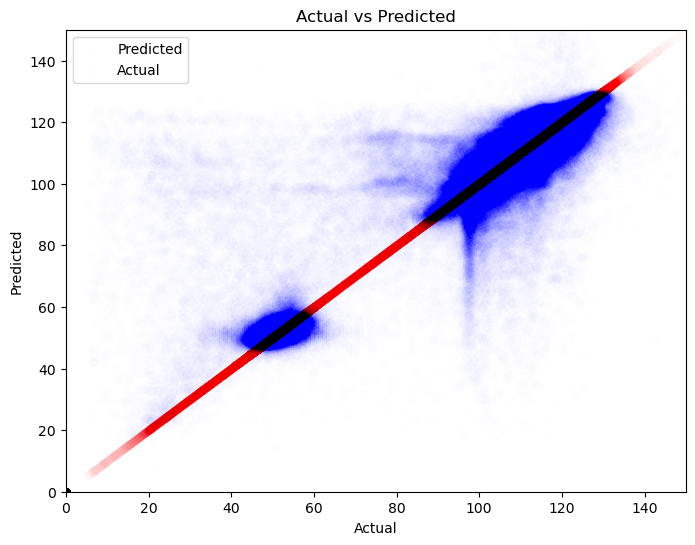

In [72]:
import matplotlib.pyplot as plt

# Plot y_pred vs y_test with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.005)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.005)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.xlim(0, 150)  # Set x-axis limit
plt.ylim(0, 150)  # Set y-axis limit
plt.legend()
plt.show()


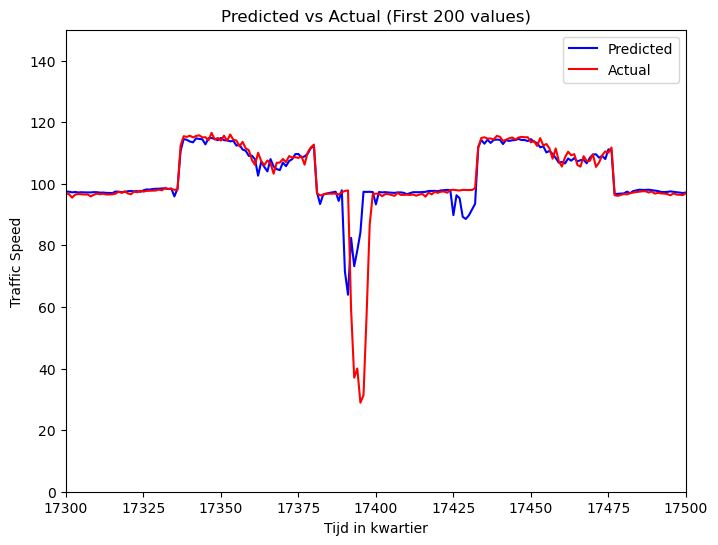

In [85]:
import matplotlib.pyplot as plt

# Generate x-values for the first 200 values
x_values = range(100000)

# Plot y_pred and y_test for the first 200 values
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_pred[:100000], color='blue', label='Predicted')
plt.plot(x_values, y_test[:100000], color='red', label='Actual')
plt.xlabel('Tijd in kwartier')
plt.ylabel('Traffic Speed')
plt.title('Predicted vs Actual (First 200 values)')
plt.legend()
plt.xlim(17300, 17500)  # Set x-axis limit
plt.ylim(0, 150)  # Set y-axis limit
plt.show()


In [24]:
grouped_data = encoded_data

In [25]:
grouped_data

,date,year,month,day,hour,minute,day_of_week,weekend,lanes,intensiteit,...,id_meetlocatie_RWS01_MONIBAS_0271hrl1140ra,id_meetlocatie_RWS01_MONIBAS_0271hrr1140ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1476ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1476ra,id_meetlocatie_RWS01_MONIBAS_0321hrl0654ra,id_meetlocatie_RWS01_MONIBAS_0321hrr0654ra,id_meetlocatie_RWS01_MONIBAS_0731hrl1018ra,id_meetlocatie_RWS01_MONIBAS_0731hrr1018ra
0,2016-01-01,2016,1,1,0,0,4,0,5,86.00,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01,2016,1,1,0,15,4,0,5,80.50,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01,2016,1,1,0,30,4,0,5,119.00,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-01,2016,1,1,0,45,4,0,5,166.00,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,2016,1,1,1,0,4,0,5,262.25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946046,2019-12-31,2019,12,31,22,45,1,0,8,102.00,...,0,0,0,0,0,0,0,0,0,1
2946047,2019-12-31,2019,12,31,23,0,1,0,8,78.00,...,0,0,0,0,0,0,0,0,0,1
2946048,2019-12-31,2019,12,31,23,15,1,0,8,64.00,...,0,0,0,0,0,0,0,0,0,1
2946049,2019-12-31,2019,12,31,23,30,1,0,8,34.00,...,0,0,0,0,0,0,0,0,0,1


In [26]:
import pandas as pd

# Assuming grouped_data is your DataFrame# Assuming grouped_data is your DataFrame
grouped_data = grouped_data[(grouped_data['hour'] < 6) | (grouped_data['hour'] > 21)]

# Assuming grouped_data is your DataFrame
grouped_data.drop(columns=['date'], inplace=True)

/var/folders/z1/4s69my7s1xq49f6ylfhnfr6h0000gn/T/ipykernel_20572/2868022838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data.drop(columns=['date'], inplace=True)


In [27]:
print(grouped_data['hour'].dtype)


int64


In [28]:
grouped_data

,year,month,day,hour,minute,day_of_week,weekend,lanes,intensiteit,avg_speed,...,id_meetlocatie_RWS01_MONIBAS_0271hrl1140ra,id_meetlocatie_RWS01_MONIBAS_0271hrr1140ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrl1476ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1029ra,id_meetlocatie_RWS01_MONIBAS_0281hrr1476ra,id_meetlocatie_RWS01_MONIBAS_0321hrl0654ra,id_meetlocatie_RWS01_MONIBAS_0321hrr0654ra,id_meetlocatie_RWS01_MONIBAS_0731hrl1018ra,id_meetlocatie_RWS01_MONIBAS_0731hrr1018ra
0,2016,1,1,0,0,4,0,5,86.00,105.612907,...,0,0,0,0,0,0,0,0,0,0
1,2016,1,1,0,15,4,0,5,80.50,111.067826,...,0,0,0,0,0,0,0,0,0,0
2,2016,1,1,0,30,4,0,5,119.00,104.571008,...,0,0,0,0,0,0,0,0,0,0
3,2016,1,1,0,45,4,0,5,166.00,102.914639,...,0,0,0,0,0,0,0,0,0,0
4,2016,1,1,1,0,4,0,5,262.25,101.372326,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946046,2019,12,31,22,45,1,0,8,102.00,113.428431,...,0,0,0,0,0,0,0,0,0,1
2946047,2019,12,31,23,0,1,0,8,78.00,114.015256,...,0,0,0,0,0,0,0,0,0,1
2946048,2019,12,31,23,15,1,0,8,64.00,116.876719,...,0,0,0,0,0,0,0,0,0,1
2946049,2019,12,31,23,30,1,0,8,34.00,123.868824,...,0,0,0,0,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Preprocess the data
# Assuming 'grouped_data' is your DataFrame and 'avg_speed' is the target variable
# Drop rows with missing values and select features
grouped_data.dropna(inplace=True)
X = grouped_data.drop(['avg_speed'], axis=1)  # Features
y = grouped_data['avg_speed']  # Target variable

# If you have categorical variables, you might need to encode them using one-hot encoding or other techniques

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
model = RandomForestRegressor(n_estimators=20, random_state=42)  # Initialize Random Forest model
model.fit(X_train, y_train)  # Train the model

# Step 4: Evaluate the model
y_pred = model.predict(X_test)  # Make predictions
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Step 5: Optionally, tune hyperparameters to improve model performance
# You can use techniques like GridSearchCV or RandomizedSearchCV to search for optimal hyperparameters


/var/folders/z1/4s69my7s1xq49f6ylfhnfr6h0000gn/T/ipykernel_9436/306197270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data.dropna(inplace=True)


Root Mean Squared Error: 7.8397972067750255


In [ ]:
grouped_data

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm  # Import tqdm for progress bar

# Simplified SVR model with linear kernel
model = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1.0))


# Step 4: Evaluate the model
y_pred = model.predict(X_test)  # Make predictions
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error using numpy
print("Root Mean Squared Error:", rmse)


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Step 1: Preprocess the data
# Assuming 'grouped_data' is your DataFrame and 'avg_speed' is the target variable
# Drop rows with missing values and select features
grouped_data.dropna(inplace=True)
X = grouped_data.drop(['avg_speed'], axis=1)  # Features
y = grouped_data['avg_speed']  # Target variable

# If you have categorical variables, you might need to encode them using one-hot encoding or other techniques

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVR model
model = make_pipeline(StandardScaler(), SVR())  # Initialize SVR model with scaling
model.fit(X_train, y_train)  # Train the model

# Step 4: Evaluate the model
y_pred = model.predict(X_test)  # Make predictions
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error using numpy
print("Root Mean Squared Error:", rmse)


In [ ]:
grouped_data.describe()

In [ ]:
data.nunique()

In [ ]:
filtered_data = data[data['id_meetlocatie'] != 'RWS01_MONIBAS_0021hrl1729ra']

In [ ]:
filtered_data.describe()

In [ ]:
filtered_data = data[data['technical_exclusion'] != 'NaN']

In [ ]:
filtered_data.dtypes